<a href="https://colab.research.google.com/github/Yashwanth-b-k/house_price_prediction/blob/main/price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installation

In [2]:
!pip install numpy pandas matplotlib seaborn scikit-learn

In [3]:
from google.colab import files

uploaded = files.upload()  # Opens a file upload dialog


Saving housing.csv to housing.csv


# imports

In [7]:
import pandas as pd  #used for data manipulation and analysis.
import numpy as np  #used for mathematical computations and working with large datasets
import matplotlib.pyplot as plt  #creating visualizations like line plots, bar charts, histograms, and scatter plots.
import seaborn as sns  # provides beautiful, high-level statistical graphs with less code.

#read data

In [8]:
data = pd.read_csv('housing.csv')
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


#clean data
droping null values

In [9]:
data.dropna(inplace=True)  #drop null values || inplace - It determines whether the operation modifies the original DataFrame or creates a new one.
data.info()  #get info

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


#split data

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

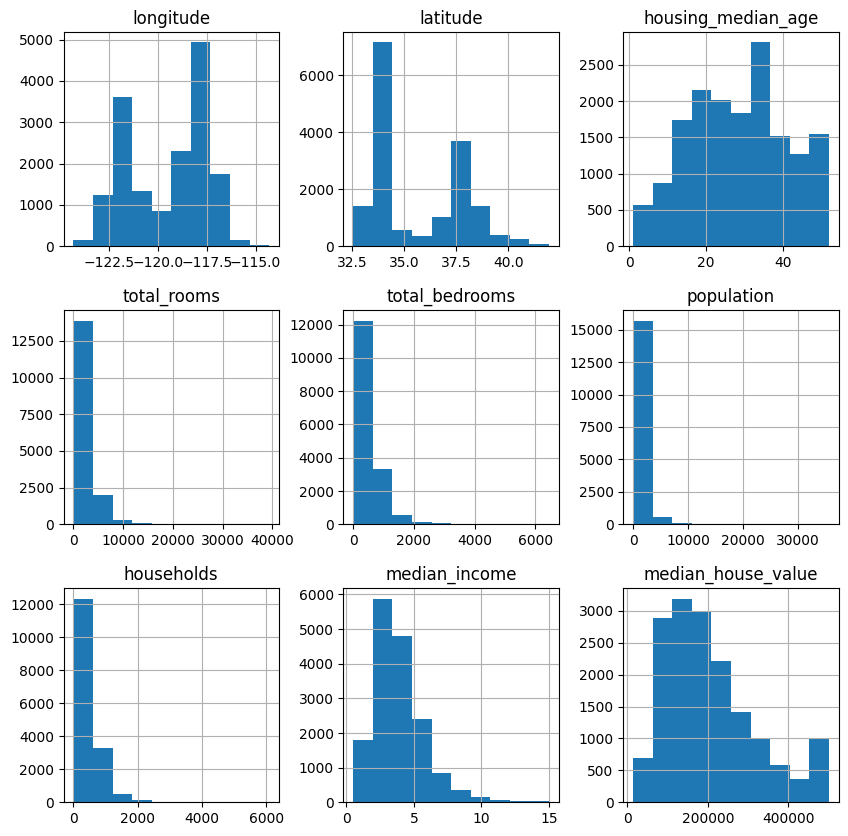

In [13]:
train_data = x_train.join(y_train)  # exploratory data analysis (EDA)
train_data.hist(figsize=(10, 10))

In [14]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
20420,-118.83,34.18,23.0,5647.0,786.0,2050.0,738.0,6.3586,<1H OCEAN,348300.0
6096,-117.87,34.12,34.0,1004.0,220.0,772.0,217.0,3.8571,<1H OCEAN,174500.0
15211,-117.09,32.99,18.0,3215.0,588.0,1618.0,509.0,4.6028,<1H OCEAN,216800.0
12225,-116.90,33.65,15.0,652.0,149.0,248.0,97.0,2.1071,INLAND,93800.0
3945,-118.62,34.21,26.0,3234.0,517.0,1597.0,513.0,6.1074,<1H OCEAN,258600.0
...,...,...,...,...,...,...,...,...,...,...
6932,-118.08,34.01,36.0,1248.0,322.0,1282.0,326.0,3.2031,<1H OCEAN,147600.0
15704,-122.43,37.79,52.0,3219.0,969.0,1152.0,830.0,4.2042,NEAR BAY,500001.0
19800,-123.32,40.43,15.0,661.0,146.0,131.0,57.0,0.4999,INLAND,56700.0
1399,-122.08,37.96,21.0,9135.0,1534.0,3748.0,1502.0,6.0859,NEAR BAY,266000.0


<Axes: >

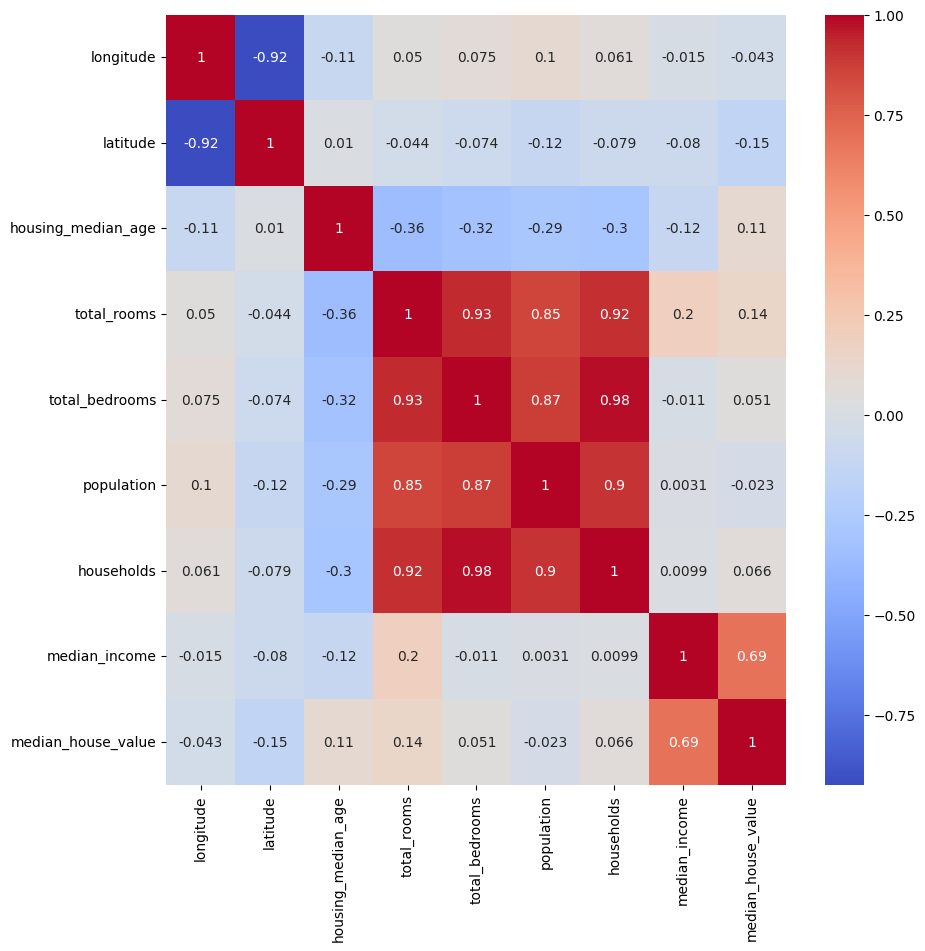

In [15]:
numbered_train_data = train_data.select_dtypes(include=['number'])  # Remove non-numeric columns
plt.figure(figsize=(10, 10))
sns.heatmap(numbered_train_data.corr(), annot=True, cmap="coolwarm")  #Computes correlation +1 highly corelated, -1 weakly corelated

# preprocess
reducing skweeness we use log

In [ ]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

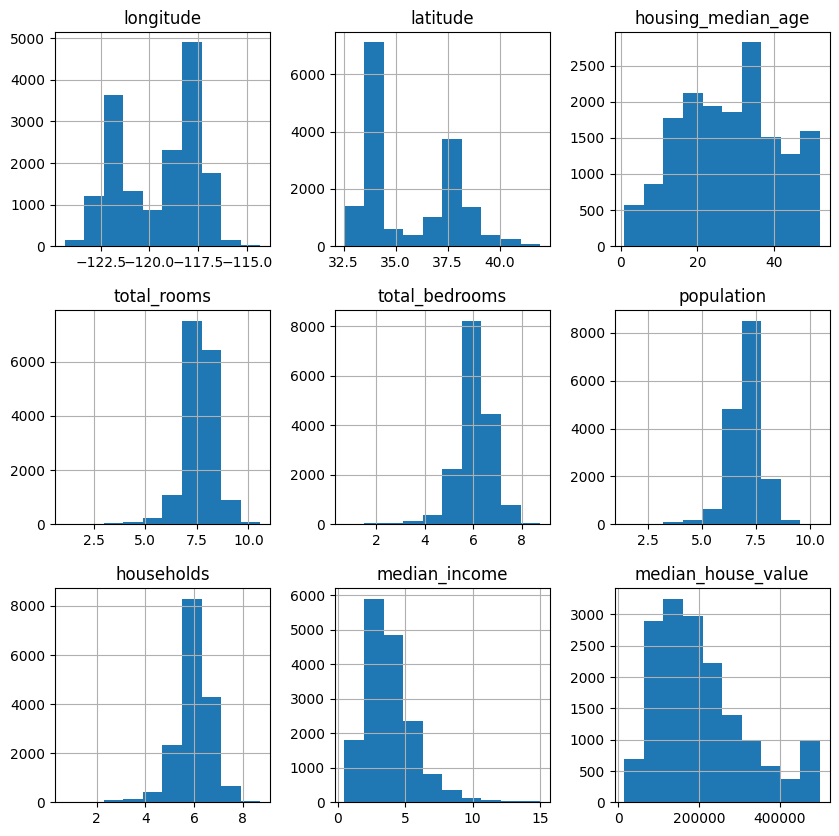

In [ ]:
train_data.hist(figsize=(10, 10))

In [16]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity).astype(int))
train_data = train_data.drop(['ocean_proximity'], axis=1)

train_data


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
20420,-118.83,34.18,23.0,5647.0,786.0,2050.0,738.0,6.3586,348300.0,1,0,0,0,0
6096,-117.87,34.12,34.0,1004.0,220.0,772.0,217.0,3.8571,174500.0,1,0,0,0,0
15211,-117.09,32.99,18.0,3215.0,588.0,1618.0,509.0,4.6028,216800.0,1,0,0,0,0
12225,-116.90,33.65,15.0,652.0,149.0,248.0,97.0,2.1071,93800.0,0,1,0,0,0
3945,-118.62,34.21,26.0,3234.0,517.0,1597.0,513.0,6.1074,258600.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6932,-118.08,34.01,36.0,1248.0,322.0,1282.0,326.0,3.2031,147600.0,1,0,0,0,0
15704,-122.43,37.79,52.0,3219.0,969.0,1152.0,830.0,4.2042,500001.0,0,0,0,1,0
19800,-123.32,40.43,15.0,661.0,146.0,131.0,57.0,0.4999,56700.0,0,1,0,0,0
1399,-122.08,37.96,21.0,9135.0,1534.0,3748.0,1502.0,6.0859,266000.0,0,0,0,1,0


<Axes: >

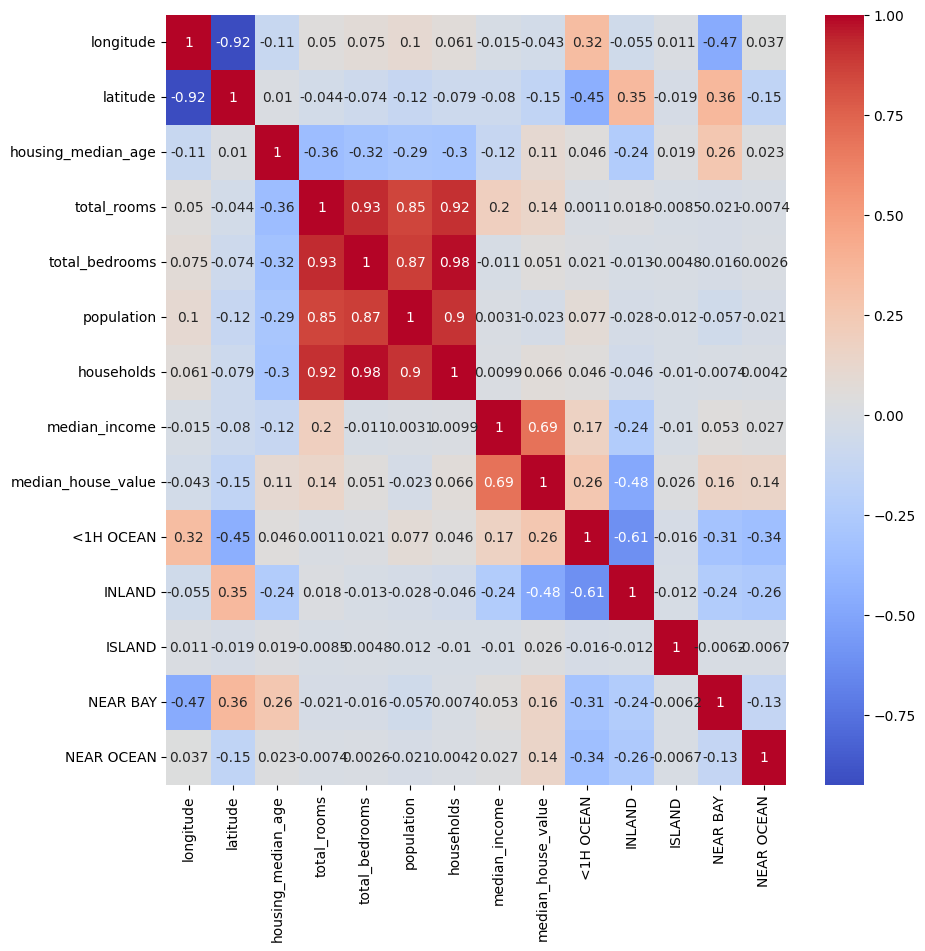

In [17]:
plt.figure(figsize=(10, 10))
sns.heatmap(train_data.corr(), annot=True, cmap="coolwarm")

<Axes: xlabel='latitude', ylabel='longitude'>

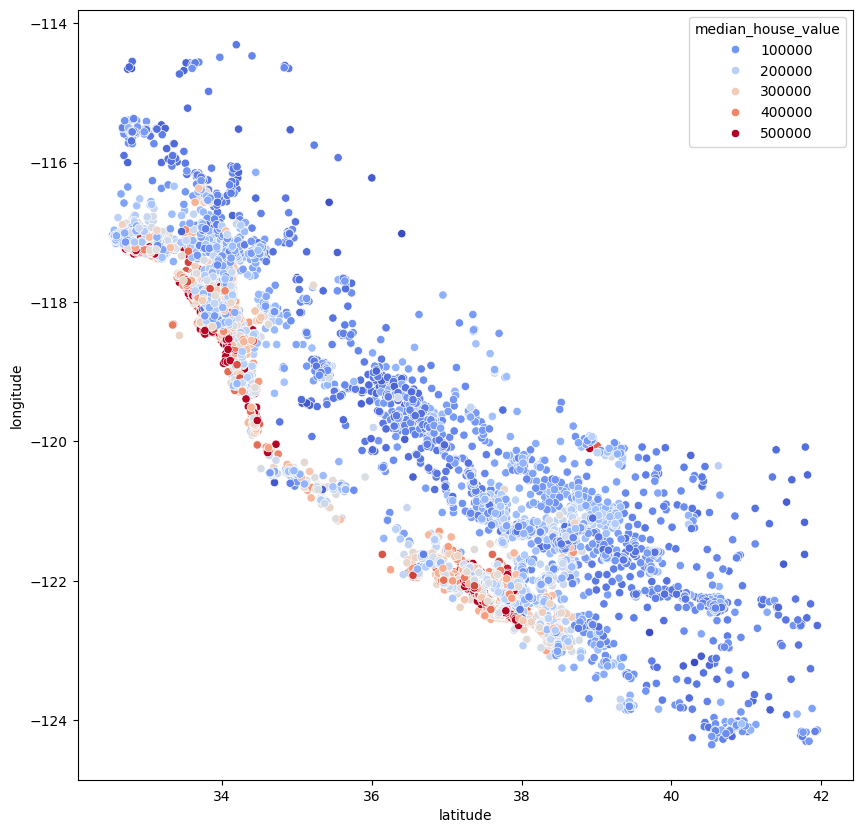

In [18]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x="latitude", y="longitude", data = train_data, hue="median_house_value", palette="coolwarm")

#feature engg
creating extra data
- created 2 feature using the data

In [19]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

<Axes: >

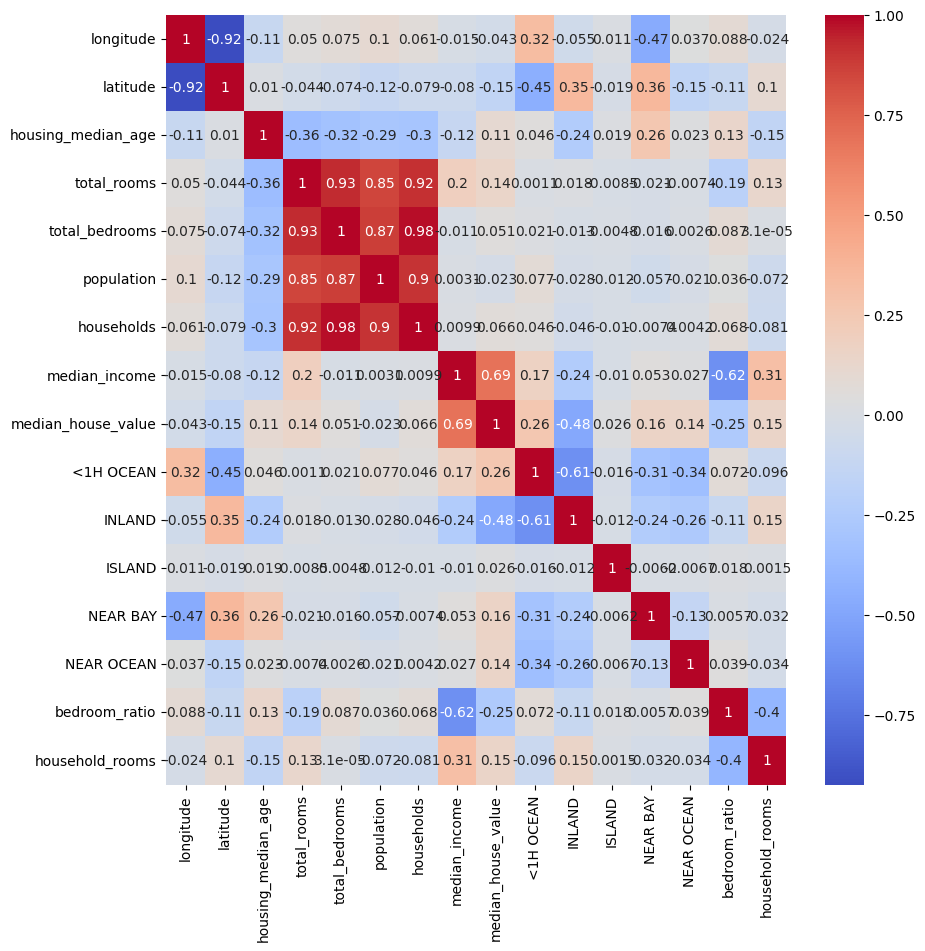

In [20]:
plt.figure(figsize=(10, 10))
sns.heatmap(train_data.corr(), annot=True, cmap="coolwarm")

#linear regression

In [21]:
from sklearn.linear_model import LinearRegression
x_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']

reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [26]:
test_data = x_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity).astype(int))
test_data = test_data.drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

x_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']


AttributeError: 'DataFrame' object has no attribute 'ocean_proximity'

In [24]:
# R^2 =1 → Perfect model (100% of variance explained).
# 𝑅^2 =0 → Model is no better than predicting the mean.
# 𝑅^2<0 → Model is worse than predicting the mean (poor fit).

reg.score(x_test, y_test)

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- ISLAND


# test new input

In [27]:
import numpy as np
import pandas as pd

# Get user input
total_rooms = float(input("Enter total rooms: "))
total_bedrooms = float(input("Enter total bedrooms: "))
population = float(input("Enter population: "))
households = float(input("Enter households: "))
housing_median_age = float(input("Enter housing median age: "))
latitude = float(input("Enter latitude: "))
longitude = float(input("Enter longitude: "))
median_income = float(input("Enter median income: "))
ocean_proximity = input("Enter ocean proximity (options: 'NEAR BAY', 'INLAND', 'NEAR OCEAN', 'ISLAND', '<1H OCEAN'): ")

# Apply log transformation (as in training)
total_rooms = np.log(total_rooms + 1)
total_bedrooms = np.log(total_bedrooms + 1)
population = np.log(population + 1)
households = np.log(households + 1)

# Create input dictionary
new_data = {
    "housing_median_age": [housing_median_age],
    "latitude": [latitude],
    "longitude": [longitude],
    "median_income": [median_income],
    "total_rooms": [total_rooms],
    "total_bedrooms": [total_bedrooms],
    "population": [population],
    "households": [households],
    "bedroom_ratio": [total_bedrooms / total_rooms],
    "household_rooms": [total_rooms / households]
}

# One-hot encoding for ocean proximity
ocean_categories = ["NEAR BAY", "INLAND", "NEAR OCEAN", "ISLAND", "<1H OCEAN"]
for category in ocean_categories:
    new_data[category] = [1 if ocean_proximity == category else 0]

# Convert to DataFrame
new_df = pd.DataFrame(new_data)

# Ensure feature order matches training data
new_df = new_df[train_data.drop("median_house_value", axis=1).columns]

# Predict house price
predicted_price = reg.predict(new_df)
print(f"\n🏡 Predicted House Price: ${predicted_price[0]:,.2f}")


KeyboardInterrupt: Interrupted by user